In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data (X) - Acidity of milk  Data(Y) Density of the milk

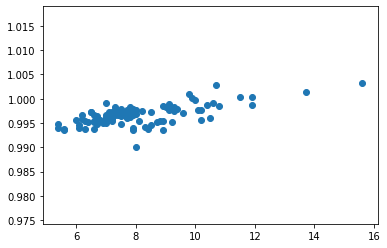

In [5]:
def readdata(filename):
    df = pd.read_csv(filename)
    return df.values

x = readdata('linearX.csv')
y = readdata('linearY.csv')
x = x.reshape((99,))
y = y.reshape((99,))

plt.scatter(x,y)

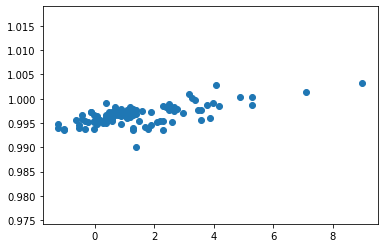

In [7]:
# Normalisation Step
x = x - x.mean()/(x.std())
plt.scatter(x,y)


### Linear Regression 

In [8]:
def hypothesis(theta,x):
    return theta[0] + theta[1]*x

def error(x,y,theta):
    totalerror = 0
    n = x.shape[0]
    
    for i in range(n):
        totalerror+=(y[i] - hypothesis(theta,x[i]))**2
        
    return totalerror*0.5

def gradient(x,y,theta):
    grad = np.array([0.0,0.0])
    n = x.shape[0]
    
    for i in range(n):
        grad[0]+=(y[i] - hypothesis(theta,x[i]))
        grad[1]+=(y[i] - hypothesis(theta,x[i]))*x[i]
        
    return grad

def gradientDescent(x,y,learning_rate):
    theta = np.array([0.0,0.0])
    e=[]
    count=0
    while True:
        count+=1
        grad = gradient(x,y,theta)
        ce = error(x,y,theta)
        if(ce<=0.001):
            break
        theta[0]+=(learning_rate)*(grad[0])
        theta[1]+=(learning_rate)*(grad[1])
        e.append(ce)
        
    print(count)
    return theta,e

    
theta,e = gradientDescent(x,y,learning_rate=0.001)
print(theta)

#the number 62 below tells us that within only 62 iterations we can acheive the provided error condition

94
[0.99027641 0.00245301]


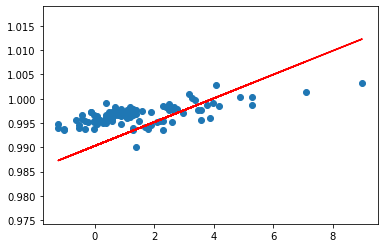

In [9]:

plt.scatter(x,y)
# plt.scatter(x,hypothesis(theta,x),color='r')
plt.plot(x,hypothesis(theta,x),color='r')
plt.show()

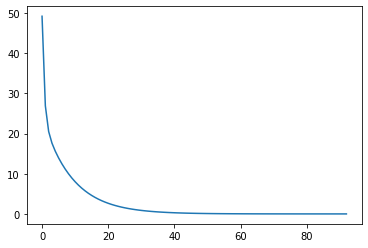

In [10]:
plt.plot(e)